In [30]:
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import models , layers
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_size=256
batch_size=32
channels=3
epochs=5

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('G:\projects\potato_project\Data\potato',
                                                    shuffle=True,
                                                    image_size=(image_size,image_size),
                                                   batch_size=batch_size)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

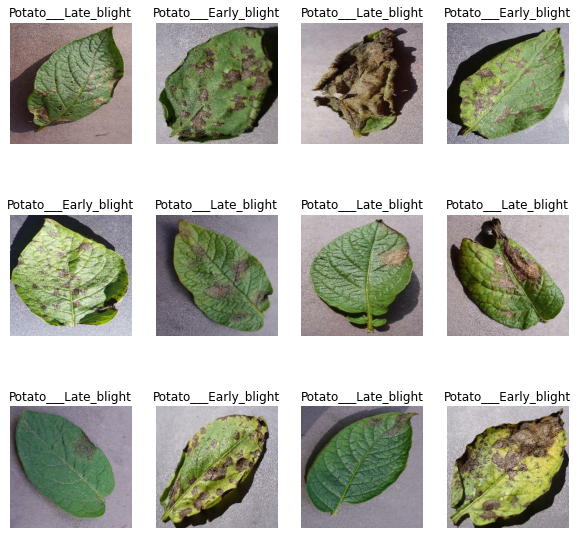

In [5]:
plt.figure(figsize=(10,10))
for image_batch,lable_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[lable_batch[i]])
        plt.axis('off')

train data is 80%,testdata 10,validation 10

In [6]:
def data_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    train_data=ds.take(train_size)
    val_data=ds.skip(train_size).take(val_size)
    test_data=ds.skip(train_size).skip(val_size)
    return train_data,val_data,test_data

In [7]:
train_data,val_data,test_data=data_partition(dataset)

In [8]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [10]:
data_agumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [11]:
input_shape=(batch_size,image_size,image_size,channels)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])
model.build(input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']  
)

In [14]:
history=model.fit(train_data,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=val_data)

Epoch 1/5
54/54 [==============================] - 364s 6s/step - loss: 0.9044 - accuracy: 0.4896 - val_loss: 0.8382 - val_accuracy: 0.5208
Epoch 2/5
54/54 [==============================] - 295s 5s/step - loss: 0.6163 - accuracy: 0.7292 - val_loss: 0.7759 - val_accuracy: 0.5990
Epoch 3/5
54/54 [==============================] - 237s 4s/step - loss: 0.4370 - accuracy: 0.8200 - val_loss: 0.6460 - val_accuracy: 0.6979
Epoch 4/5
54/54 [==============================] - 266s 5s/step - loss: 0.3145 - accuracy: 0.8791 - val_loss: 0.2671 - val_accuracy: 0.8802
Epoch 5/5
54/54 [==============================] - 240s 4s/step - loss: 0.3177 - accuracy: 0.8756 - val_loss: 0.2846 - val_accuracy: 0.8594


In [15]:
scores=model.evaluate(test_data)

8/8 [==============================] - 97s 924ms/step - loss: 0.3229 - accuracy: 0.8867


In [16]:
scores

[0.322892963886261, 0.88671875]

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
traing_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

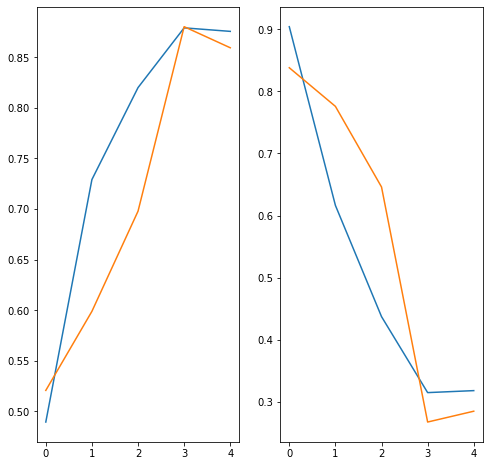

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),traing_acc,label='training_acc')
plt.plot(range(epochs),val_acc,label='val_acc')
plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='loss')
plt.plot(range(epochs),val_loss,label='val_loss')

first image to predict
actual_label...... Potato___Early_blight
predict_label...... Potato___Early_blight


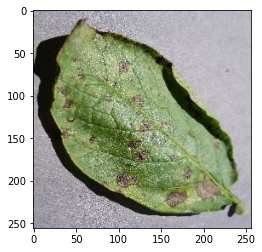

In [40]:
for image_batch,lable_batch in test_data.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=lable_batch[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print('actual_label......',class_names[first_label])
    batch_pred=model.predict(image_batch)
    print('predict_label......',class_names[np.argmax(batch_pred[0])])

In [43]:
model.save(r'C:\Users\abhi\Documents\potato_project\model\1')

INFO:tensorflow:Assets written to: C:\Users\abhi\Documents\potato_project\model\1\assets
